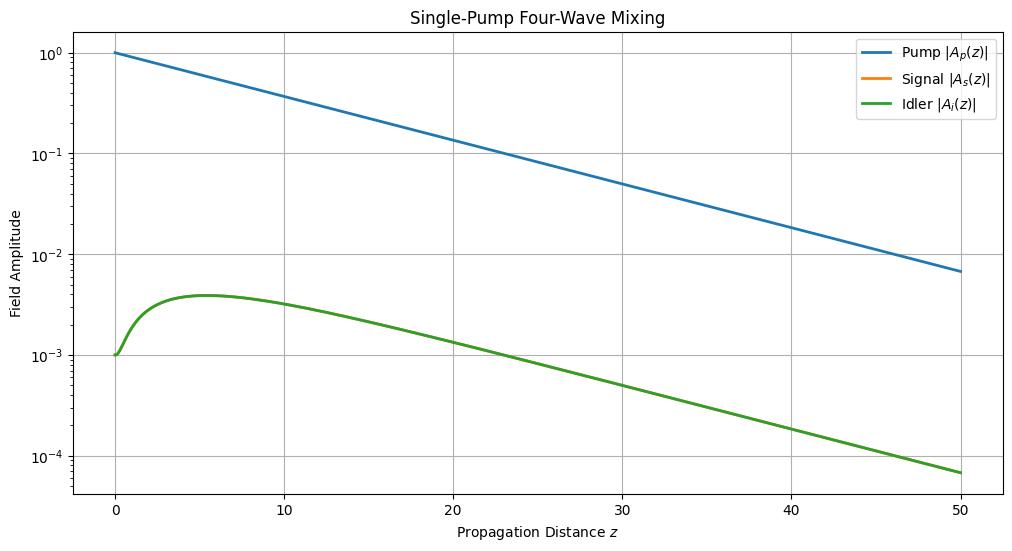

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the coupled differential equations for real and imaginary parts
def fwm_eqs(z, A, gamma, alpha_p, alpha_s, alpha_i, delta_beta):
    A_p_real, A_p_imag, A_s_real, A_s_imag, A_i_real, A_i_imag = A
    
    A_p = A_p_real + 1j * A_p_imag
    A_s = A_s_real + 1j * A_s_imag
    A_i = A_i_real + 1j * A_i_imag
    
    dA_p_dz = -alpha_p * A_p + 1j * gamma * (np.abs(A_p)**2 * A_p + 2 * np.abs(A_s)**2 * A_p + 2 * np.abs(A_i)**2 * A_p)
    dA_s_dz = -alpha_s * A_s + 1j * gamma * (2 * np.abs(A_p)**2 * A_s + A_p**2 * np.conj(A_i)) * np.exp(1j * delta_beta * z)
    dA_i_dz = -alpha_i * A_i + 1j * gamma * (2 * np.abs(A_p)**2 * A_i + A_p**2 * np.conj(A_s)) * np.exp(1j * delta_beta * z)
    
    return [dA_p_dz.real, dA_p_dz.imag, dA_s_dz.real, dA_s_dz.imag, dA_i_dz.real, dA_i_dz.imag]

# Parameters
gamma = 1.0  # Nonlinear coefficient
alpha_p = 0.1  # Attenuation coefficient for pump
alpha_s = 0.1  # Attenuation coefficient for signal
alpha_i = 0.1  # Attenuation coefficient for idler
delta_beta = 0.0  # Phase mismatch

# Initial conditions: Pump has high power, signal and idler start with small values (quantum noise)
A_p0 = 1.0
A_s0 = 1e-3
A_i0 = 1e-3

initial_conditions = [A_p0.real, A_p0.imag, A_s0.real, A_s0.imag, A_i0.real, A_i0.imag]

# Propagation distance range
z_range = [0, 50]

# Solve the differential equations
sol = solve_ivp(fwm_eqs, z_range, initial_conditions, args=(gamma, alpha_p, alpha_s, alpha_i, delta_beta), dense_output=True)

# Evaluate the solution at points for plotting
z_vals = np.linspace(z_range[0], z_range[1], 1000)
sol_vals = sol.sol(z_vals)
A_p_vals = sol_vals[0] + 1j * sol_vals[1]
A_s_vals = sol_vals[2] + 1j * sol_vals[3]
A_i_vals = sol_vals[4] + 1j * sol_vals[5]

# Plotting the results with logarithmic scale for better visualization
plt.figure(figsize=(12, 6))
plt.plot(z_vals, np.abs(A_p_vals), label='Pump $|A_p(z)|$', linewidth=2)
plt.plot(z_vals, np.abs(A_s_vals), label='Signal $|A_s(z)|$', linewidth=2)
plt.plot(z_vals, np.abs(A_i_vals), label='Idler $|A_i(z)|$', linewidth=2)
plt.yscale('log')
plt.xlabel('Propagation Distance $z$')
plt.ylabel('Field Amplitude')
plt.title('Single-Pump Four-Wave Mixing')
plt.legend()
plt.grid(True)
plt.show()
